In [1]:
import os

import pandas

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import seaborn
import scipy.stats

import math

import datetime
import pytz

In [2]:
root_path = '/Users/matthieu/Documents/proto3/blumau_experiments_processing/data/beetle/'

data_path = root_path + '1feeder/'
conf_path = root_path + 'config/'

data_file = data_path + '1feeder_exp_result_5mins.csv'

In [3]:
# From google sheets spreadsheet
data_raw = pandas.read_csv(data_file)

datetime_objects    = []
starttime_objects   = []
type_objects        = []

for ind, dat in data_raw.iterrows():

    dt_str          = dat.Date
    start_time_str  = dat.Time

    
    if dat.type == 'Ctrl' :
        type_dat    = 0
    elif dat.type == 'Vibs':
        type_dat    = 1
    else :
        type_dat    = -1


    datetime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str, "%d.%m.%y")))
    starttime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+'T'+start_time_str, "%d.%m.%yT%H:%M:%S")))
    type_objects.append(type_dat)


data_raw['dt'] = datetime_objects
data_raw['dtts_start'] = starttime_objects
data_raw['type_hr'] = data_raw['type']
data_raw['type'] = type_objects
data_raw

,Date,Time,Exp_id,Vibrate,type,visits,recruits,removed,dt,dtts_start,type_hr
0,18.07.23,09:10:00,1.0,1.0,1,15,0,10,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,Vibs
1,18.07.23,09:15:00,1.0,1.0,1,3,2,12,2023-07-18 00:00:00+00:00,2023-07-18 09:15:00+00:00,Vibs
2,18.07.23,09:20:00,1.0,1.0,1,6,1,0,2023-07-18 00:00:00+00:00,2023-07-18 09:20:00+00:00,Vibs
3,18.07.23,09:25:00,1.0,1.0,1,4,0,0,2023-07-18 00:00:00+00:00,2023-07-18 09:25:00+00:00,Vibs
4,18.07.23,09:30:00,1.0,1.0,1,3,0,0,2023-07-18 00:00:00+00:00,2023-07-18 09:30:00+00:00,Vibs
...,...,...,...,...,...,...,...,...,...,...,...
822,27.07.23,13:25:00,29.0,1.0,1,3,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:25:00+00:00,Vibs
823,27.07.23,13:30:00,29.0,1.0,1,4,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:30:00+00:00,Vibs
824,27.07.23,13:35:00,29.0,1.0,1,6,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:35:00+00:00,Vibs
825,27.07.23,13:40:00,29.0,1.0,1,3,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:40:00+00:00,Vibs


In [4]:
exp_duration = datetime.timedelta(minutes=120)
data_raw = data_raw.replace('#', 0)
data_clean = data_raw[data_raw.type_hr != 'None'].fillna(0)

data_120mins = []
count_nb_periods = 0
start_timestamp = pytz.utc.localize(datetime.datetime(1994, 3, 26, 6, 25, 0))
stop_timestamp = []
data_point = {}
for dat_i, dat in data_clean.iterrows():
    if dat.dtts_start < start_timestamp + exp_duration:
        count_nb_periods += 1

        data_point['duration']          += datetime.timedelta(minutes=5)
        data_point['count_agregation']  = count_nb_periods
        data_point['visits']            += int(dat.visits)
        data_point['removed']           += int(dat.removed)
        data_point['recruits']          += int(dat.recruits)
        data_point['dtts_stop']         = data_point['dtts_start'] + data_point['duration']
    else :
        data_120mins.append(data_point)
        count_nb_periods = 1
        start_timestamp = dat.dtts_start
        data_point = {}
        data_point['exp_nb']            = int(dat.Exp_id)
        data_point['dt']                = dat['dt']
        data_point['dtts_start']        = dat.dtts_start
        data_point['dtts_stop']         = []
        data_point['type']              = dat.type
        data_point['type_hr']           = dat.type_hr
        data_point['duration']          = datetime.timedelta(minutes=5)
        data_point['count_agregation']  = 1
        data_point['visits']            = int(dat.visits)
        data_point['removed']           = int(dat.removed)
        data_point['recruits']          = int(dat.recruits)

data_120mins.append(data_point)
    
data = pandas.DataFrame.from_dict(data_120mins[1:])
data

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits
0,1,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,110,22,6
1,2,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,96,36,14
2,3,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,219,47,9
3,4,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,95,36,6
4,5,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,164,13,0
5,6,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2
6,7,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,100,34,2
7,8,2023-07-20 00:00:00+00:00,2023-07-20 14:20:00+00:00,2023-07-20 16:20:00+00:00,0,Ctrl,0 days 02:00:00,24,68,7,0
8,9,2023-07-21 00:00:00+00:00,2023-07-21 09:20:00+00:00,2023-07-21 11:20:00+00:00,1,Vibs,0 days 02:00:00,24,70,13,1
9,10,2023-07-21 00:00:00+00:00,2023-07-21 12:15:00+00:00,2023-07-21 14:15:00+00:00,1,Vibs,0 days 02:00:00,24,72,8,8


In [5]:
days_to_discard_str = ['23/07/18', '23/07/20', '23/07/21', '23/07/22', '23/07/24', '23/07/25']
# 20 ? # '23/07/20', 
# 24 apparently warm. Feeder moved during the previous night (problematic position?)
# 25 particularly cold
# 26 kinda cold
days_to_discard = [pytz.utc.localize(datetime.datetime.strptime(x, '%y/%m/%d')) for x in days_to_discard_str]

data_cleaned = data
for d in days_to_discard:
    data_cleaned = data_cleaned[data_cleaned.dt != d]

data_cleaned

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits
2,3,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,219,47,9
3,4,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,95,36,6
4,5,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,164,13,0
14,15,2023-07-23 00:00:00+00:00,2023-07-23 09:10:00+00:00,2023-07-23 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,134,6,22
15,16,2023-07-23 00:00:00+00:00,2023-07-23 11:40:00+00:00,2023-07-23 13:40:00+00:00,1,Vibs,0 days 02:00:00,24,111,19,1
16,17,2023-07-23 00:00:00+00:00,2023-07-23 14:30:00+00:00,2023-07-23 16:30:00+00:00,0,Ctrl,0 days 02:00:00,24,171,13,14
17,18,2023-07-23 00:00:00+00:00,2023-07-23 16:45:00+00:00,2023-07-23 18:45:00+00:00,1,Vibs,0 days 02:00:00,24,109,25,1
24,25,2023-07-26 00:00:00+00:00,2023-07-26 11:30:00+00:00,2023-07-26 13:30:00+00:00,0,Ctrl,0 days 02:00:00,24,85,16,0
25,26,2023-07-26 00:00:00+00:00,2023-07-26 14:20:00+00:00,2023-07-26 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,88,4,0
26,27,2023-07-26 00:00:00+00:00,2023-07-26 16:50:00+00:00,2023-07-26 18:50:00+00:00,0,Ctrl,0 days 02:00:00,24,202,0,17


Ranksums test for all data : RanksumsResult(statistic=-0.9209109202723808, pvalue=0.3570969367257303)
Ranksums test for cleaned data : RanksumsResult(statistic=-2.2735942402352203, pvalue=0.022990394092464894)


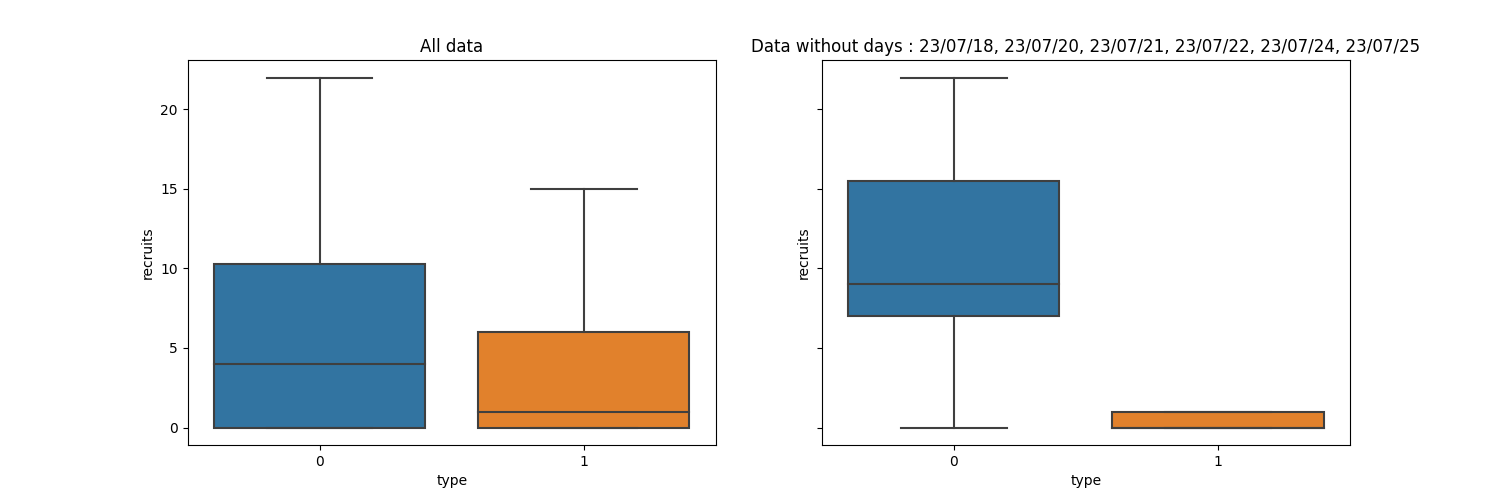

In [6]:
fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(15,5), sharey=True)
ax[0].set_title('All data')
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data, y='recruits', x='type', ax=ax[0])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# matplotlib.pyplot.figure(figsize=(8, 5))
ax[1].set_title('Data without days : ' + ', '.join(days_to_discard_str))
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data_cleaned, y='recruits', x='type', ax=ax[1])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# Wilcoxon rank-sum
print('Ranksums test for all data : {}'.format(scipy.stats.ranksums(data[data.type == 1].recruits, data[data.type == 0].recruits)))
print('Ranksums test for cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)))

In [7]:
data_none = data_raw[data_raw.type!=1].fillna(0)

data_none_agreg = []
count_nb_periods = 0
start_timestamp = pytz.utc.localize(datetime.datetime(1994, 3, 26, 6, 25, 0))
data_point = {}

for dat_i, dat in data_none.iterrows():
    if dat['dt'] == start_timestamp.date():
        count_nb_periods += 1

        data_point['count_agregation']  = count_nb_periods
        data_point['visits']            += int(dat.visits)
        data_point['removed']           += int(dat.removed)
        data_point['recruits']          += int(dat.recruits)
    else :
        data_none_agreg.append(data_point)
        count_nb_periods = 1
        start_timestamp = dat.dtts_start
        data_point = {}
        data_point['dt']                = dat['dt']
        data_point['dtts_start']        = dat.dtts_start
        data_point['count_agregation']  = 1
        data_point['visits']            = int(dat.visits)
        data_point['removed']           = int(dat.removed)
        data_point['recruits']          = int(dat.recruits)

data_none_agreg.append(data_point)

data_none_agreg = pandas.DataFrame.from_dict(data_none_agreg[1:])
data_none_agreg['recruits_rate'] = data_none_agreg.recruits/(data_none_agreg.count_agregation*5)
data_none_agreg['visits_rate'] = data_none_agreg.visits/(data_none_agreg.count_agregation*5)
data_none_agreg

/var/folders/gp/4448rp494v37dvsvd0rwbyvw0000gn/T/ipykernel_58245/1646750516.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if dat['dt'] == start_timestamp.date():


,dt,dtts_start,count_agregation,visits,removed,recruits,recruits_rate,visits_rate
0,2023-07-18 00:00:00+00:00,2023-07-18 11:10:00+00:00,30,106,36,14,0.093333,0.706667
1,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,52,357,83,16,0.061538,1.373077
2,2023-07-20 00:00:00+00:00,2023-07-20 11:10:00+00:00,62,218,41,4,0.012903,0.703226
3,2023-07-21 00:00:00+00:00,2023-07-21 11:20:00+00:00,17,78,10,12,0.141176,0.917647
4,2023-07-22 00:00:00+00:00,2023-07-22 11:10:00+00:00,43,225,29,23,0.106977,1.046512
5,2023-07-23 00:00:00+00:00,2023-07-23 09:10:00+00:00,67,411,19,46,0.137313,1.226866
6,2023-07-24 00:00:00+00:00,2023-07-24 10:45:00+00:00,70,333,29,8,0.022857,0.951429
7,2023-07-25 00:00:00+00:00,2023-07-25 12:00:00+00:00,81,336,30,1,0.002469,0.829630
8,2023-07-26 00:00:00+00:00,2023-07-26 11:30:00+00:00,65,355,16,17,0.052308,1.092308
9,2023-07-27 00:00:00+00:00,2023-07-27 09:30:00+00:00,28,151,21,8,0.057143,1.078571
